# Project Assignment #2

> "This is the notebook for the second assignment for the final project"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Johann Magbitang
- categories: [fastpages, jupyter]

## Import the Data

In [65]:
import sklearn.cluster
import sklearn.linear_model
import sklearn.model_selection

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import plotly.graph_objects as go
import pandas as pd


## importing the dataset
df = pd.read_csv('salaries-by-college-type.csv')


In [66]:
df

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN
...,...,...,...,...,...,...,...,...
264,Austin Peay State University,State,"$37,700.00","$59,200.00","$32,200.00","$40,500.00","$73,900.00","$96,200.00"
265,Pittsburg State University,State,"$40,400.00","$58,200.00","$25,600.00","$46,000.00","$84,600.00","$117,000.00"
266,Southern Utah University,State,"$41,900.00","$56,500.00","$30,700.00","$39,700.00","$78,400.00","$116,000.00"
267,Montana State University - Billings,State,"$37,900.00","$50,600.00","$22,600.00","$31,800.00","$78,500.00","$98,900.00"


In [67]:
df = df.drop(df.columns[0], axis=1) 
df.describe()

,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,269,269,269,231,269,269,231
unique,5,145,168,141,178,110,98
top,State,"$42,600.00","$72,100.00","$40,100.00","$54,100.00","$106,000.00","$150,000.00"
freq,175,7,5,6,6,11,8


In [68]:
df["School Type"].value_counts()

State           175
Liberal Arts     47
Party            20
Engineering      19
Ivy League        8
Name: School Type, dtype: int64

In [69]:
df.groupby('School Type').count()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
School Type,,,,,,
Engineering,19,19,15,19,19,15
Ivy League,8,8,8,8,8,8
Liberal Arts,47,47,14,47,47,14
Party,20,20,19,20,20,19
State,175,175,175,175,175,175


In [70]:
## subsetting the college type data to only include engineering and ivy league schools
subsetdf = df[df['School Type'].isin(['Engineering', 'Ivy League','Liberal Arts']) ]
subsetdf

,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN
...,...,...,...,...,...,...,...
89,Ivy League,"$63,400.00","$124,000.00","$54,800.00","$86,200.00","$179,000.00","$288,000.00"
90,Ivy League,"$60,900.00","$120,000.00","$55,900.00","$79,200.00","$192,000.00","$282,000.00"
91,Ivy League,"$60,300.00","$110,000.00","$56,800.00","$79,800.00","$160,000.00","$210,000.00"
92,Ivy League,"$56,200.00","$109,000.00","$55,400.00","$74,400.00","$159,000.00","$228,000.00"


In [71]:
## Original Data had values as strings as it shows the dollar sign. This will convert the strings to numerics so that they would be graphed properly

subsetcol= ['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary','Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']

for x in subsetcol:
    subsetdf[x] = subsetdf[x].str.replace("$","")
    subsetdf[x] = subsetdf[x].str.replace(",","")
    subsetdf[x] = pd.to_numeric(subsetdf[x])
subsetdf.head()

C:\Users\Patrick Magbitang\AppData\Local\Temp\ipykernel_2388\128551400.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  subsetdf[x] = subsetdf[x].str.replace("$","")
C:\Users\Patrick Magbitang\AppData\Local\Temp\ipykernel_2388\128551400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetdf[x] = subsetdf[x].str.replace("$","")
C:\Users\Patrick Magbitang\AppData\Local\Temp\ipykernel_2388\128551400.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


## Step 3: Question to Explore

How can machine learning predict what is are the most lucrative jobs in the future? <br> I will be looking at the df dataset which is a dataset that gives the starting salaries coming from different college degrees and also the future salaries. I have taken that df dataset and created a subset dataset to look specifically at engineering, ivy league, and liberal arts schools. This gives me a set of 74 observations. <br> The variables I will be looking at are Starting Median Salary which will be my independent variable, and I will be putting this against the variables that display future salary predictions. It will help me see if there is a good correlation between starting salaries and future salaries and see if these predictions of the future salaries are justified. 

## Step 4: Plots Regarding Question

In [81]:
##first thing we want to do is drop all the NA values
subsetdf = subsetdf.dropna()
subsetdf

,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
3,Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
5,Engineering,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0
6,Engineering,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0
7,Engineering,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0
8,Engineering,58300.0,106000.0,67200.0,85200.0,137000.0,183000.0
9,Engineering,58100.0,106000.0,62200.0,87900.0,142000.0,201000.0
10,Engineering,60600.0,105000.0,68700.0,81900.0,138000.0,185000.0
11,Engineering,56000.0,97800.0,56100.0,77400.0,121000.0,165000.0
12,Engineering,53000.0,96700.0,55200.0,74000.0,117000.0,153000.0


Text(0.5, 1.0, 'Starting Median Salary vs. Mid-Career')

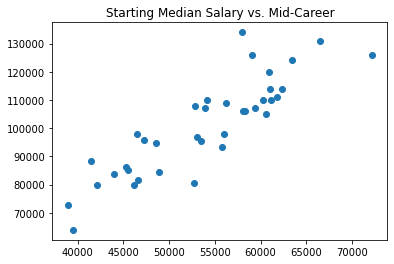

In [82]:
## Scatter plot where Starting Median Salary is taken in as the independent variable and Mid-Career Median Salary is the dependent.

x = subsetdf['Starting Median Salary']
y = subsetdf['Mid-Career Median Salary']

plt.scatter(x,y)
plt.title('Starting Median Salary vs. Mid-Career')

Text(0.5, 1.0, 'Starting Median Salary vs. Mid-Career 10th Percentile')

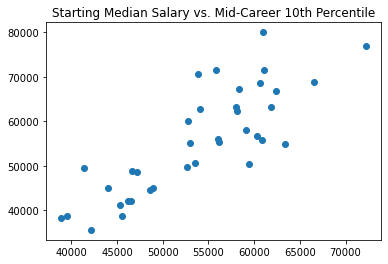

In [83]:
## Scatter plot of Starting Median Salary and Mid-Career 10th percentile
x = subsetdf['Starting Median Salary']
y = subsetdf['Mid-Career 10th Percentile Salary']

plt.scatter(x,y)
plt.title('Starting Median Salary vs. Mid-Career 10th Percentile')


Text(0.5, 1.0, 'Starting Median Salary vs. Mid-Career 25th Percentile')

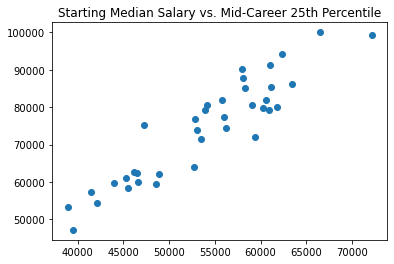

In [84]:
## Scatter plot of Starting Median Salary and Mid-Career 25th percentile
x = subsetdf['Starting Median Salary']
y = subsetdf['Mid-Career 25th Percentile Salary']

plt.scatter(x,y)
plt.title('Starting Median Salary vs. Mid-Career 25th Percentile')


Text(0.5, 1.0, 'Starting Median Salary vs. Mid-Career 75th Percentile')

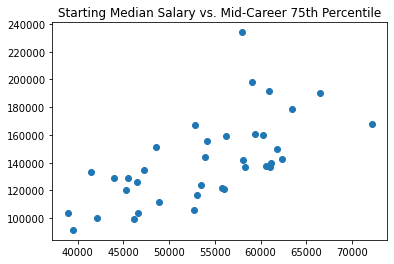

In [85]:
## Scatter plot of Starting Median Salary and Mid-Career 75th percentile
x = subsetdf['Starting Median Salary']
y = subsetdf['Mid-Career 75th Percentile Salary']

plt.scatter(x,y)
plt.title('Starting Median Salary vs. Mid-Career 75th Percentile')


Text(0.5, 1.0, 'Starting Median Salary vs. Mid-Career 90th Percentile')

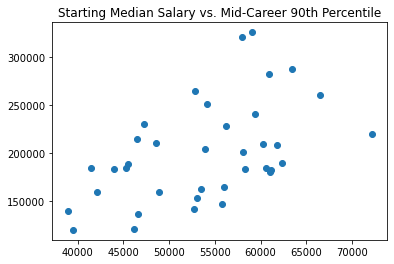

In [86]:
## Scatter plot of Starting Median Salary and Mid-Career 90th percentile
x = subsetdf['Starting Median Salary']
y = subsetdf['Mid-Career 90th Percentile Salary']

plt.scatter(x,y)
plt.title('Starting Median Salary vs. Mid-Career 90th Percentile')

## Step 5: Machine Learning Train/Test

Y-Intercept = 51626.91
X-Coefficients=  [50020.40238362]
MSE = 34236454.02
R^2 = 0.79


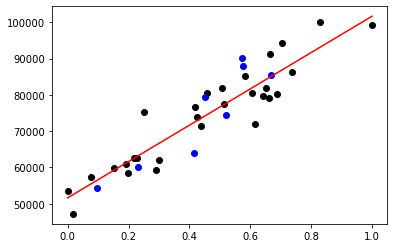

In [112]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

##setting which x and y from the plots I want to look at 
x = subsetdf['Starting Median Salary']
y = subsetdf['Mid-Career 25th Percentile Salary']

x = x.values.reshape(-1,1)

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

#setting model to use
model = sklearn.linear_model.LinearRegression()

##gathering test and training data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)


model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Y-Intercept = %.2f" % model.intercept_)
print("X-Coefficients= ", model.coef_)

print('MSE = %.2f' % mean_squared_error(y_test, y_pred))
print('R^2 = %.2f' % r2_score(y_test, y_pred))


plt.scatter(x_train,y_train,color='black')
plt.scatter(x_test,y_test,color='blue')

## Creating the Regression Model
x_model_vals = np.linspace(0.0, 1.0, 37).reshape(-1,1)
y_model1_vals = model.predict(x_model_vals)

plt.plot(x_model_vals,y_model1_vals,'red')

y_pred = model.predict(x_test)

From the train/test split we get that the mean squared error is 34236454.02 and that r squared value is 0.79. The r squared is relatively high therefore we can say the regression fits pretty well with the points from these sets.